# Who are the high-frequency traders ?

First, import librairies.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

## Process the data

In this part we have a look at data and process them to be in the right form for the learning part.

In [2]:
x_train = pd.read_csv("data/AMF_train_X_XCZw8r3.csv", index_col=0, sep=',')
y_train = pd.read_csv("data/AMF_train_Y_omYQJZL.csv", index_col=0, sep=',')

In [3]:
nrows = len(x_train)
x_train

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Index,,,,,,,,,,,,,,,,,,,,,
1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105778,Isin_84,Date_27,Trader_60,1.150000,23.000000,NaN,0.0,736.500080,0.000000,0.000188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
105779,Isin_102,Date_18,Trader_60,1.352941,23.000000,NaN,0.0,63.672695,0.000000,0.000963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
105780,Isin_12,Date_13,Trader_60,1.146667,86.000000,NaN,0.0,708.440816,0.000000,0.000578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [4]:
y_train

,type
Trader,
Trader_285,MIX
Trader_114,NON HFT
Trader_110,NON HFT
Trader_57,NON HFT
Trader_128,NON HFT
...,...
Trader_140,MIX
Trader_451,MIX
Trader_438,MIX


First, we merge the two tables to obtain label on each of the x_train row.

In [5]:
data_train = pd.merge(x_train, y_train, how = 'left', on=["Trader"])
data_train.head()

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
0,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
1,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NON HFT
2,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NON HFT
3,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
4,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NON HFT


We replace drop the column trader, which is irrelevant for our task. We also cast columns share, day and type to int.

In [50]:
# replace the type 'HFT', 'MIX', and 'NON HFT' with labels 2, 1, 0
data_train['type'] = np.where((data_train['type']=='HFT'), 2, data_train['type'])
data_train['type'] = np.where((data_train['type']=='MIX'), 1, 0)

First, we have a look at NaN values in the dataframe.

In [51]:
data_train.dropna()

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
2136,Isin_45,Date_19,Trader_107,3.828283,3.679612,758.000000,0.000000,8.159891,0.000100,1.128148,...,122.778400,15.337,0.162,122.778400,15.337,0.162,122.778400,15.337,145,1
2142,Isin_22,Date_6,Trader_107,3.554622,4.028571,282.000000,0.000000,25.144172,0.000108,6.878050,...,128.091625,100.704,14.572,136.960333,136.500,14.572,128.091625,100.704,176,1
2145,Isin_58,Date_19,Trader_107,4.366242,3.756164,342.750000,0.000000,23.728643,0.000117,0.547069,...,87.520787,8.683,0.001,100.291563,51.380,0.001,100.291563,51.380,213,1
2151,Isin_96,Date_10,Trader_107,5.530612,4.370968,90.333333,0.000000,65.091081,0.000006,2.066267,...,112.042400,0.960,0.001,61.068900,0.871,0.001,108.254909,0.960,45,1
2155,Isin_31,Date_19,Trader_107,4.852941,3.571429,103.125000,0.000000,27.298752,0.007578,8.965004,...,160.484356,89.124,0.001,140.226689,74.835,0.001,138.856726,65.830,135,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105677,Isin_38,Date_5,Trader_54,2.800000,9.333333,7.000000,0.000000,923.705447,0.000158,6.000009,...,6546.000000,6546.000,6546.000,6546.000000,6546.000,6546.000,6546.000000,6546.000,8,0
105680,Isin_102,Date_2,Trader_54,2.516484,13.470588,5.204545,0.000000,119.272342,0.000000,2.171315,...,182.285714,11.000,1.000,182.285714,11.000,1.000,182.285714,11.000,78,0
105683,Isin_102,Date_25,Trader_54,2.101695,9.538462,17.714286,0.000000,75.523207,0.000000,0.001557,...,2.000000,2.000,2.000,2.000000,2.000,2.000,2.000000,2.000,15,0
105694,Isin_12,Date_10,Trader_54,7.000000,7.000000,2.333333,0.009432,31.551883,0.009432,28.012953,...,11.000000,11.000,11.000,11.000000,11.000,11.000,11.000000,11.000,2,0


Unfortunately, there are many rows with NaN values. We loose too muc information if we just remove these rows.

Let's have a look at the columns containing NaNs.

In [52]:
# Number of rows with nan values for each column
columns_with_nan = []
for c in x_train.columns:
    if  nrows - len(x_train[c].dropna()) > 0:
        print(c, ' :', nrows - len(x_train[c].dropna()))
        columns_with_nan.append(c)
print(columns_with_nan)

OTR  : 1683
OMR  : 47612
min_dt_TV1  : 4235
mean_dt_TV1  : 4235
med_dt_TV1  : 4235
min_dt_TV1_TV2  : 25176
mean_dt_TV1_TV2  : 25176
med_dt_TV1_TV2  : 25176
min_dt_TV1_TV3  : 25255
mean_dt_TV1_TV3  : 25255
med_dt_TV1_TV3  : 25255
min_dt_TV1_TV4  : 25148
mean_dt_TV1_TV4  : 25148
med_dt_TV1_TV4  : 25148
['OTR', 'OMR', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1', 'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3', 'mean_dt_TV1_TV3', 'med_dt_TV1_TV3', 'min_dt_TV1_TV4', 'mean_dt_TV1_TV4', 'med_dt_TV1_TV4']


For each of the above columns, we have to decide if the rows with NaN values can be removed without loss of information.

In [53]:
l = columns_with_nan+['type']
df_nan = data_train[l]
df_nan.head()

,OTR,OMR,min_dt_TV1,mean_dt_TV1,med_dt_TV1,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,type
0,2.272727,12.500000,351.702399,9639.216031,1585.079495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.696629,21.571429,0.000066,493.559196,0.000901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1.482759,118.250000,0.000018,163.954785,0.000770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1.705882,29.000000,0.000148,1232.562133,0.004301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1.517730,NaN,0.000025,248.073927,0.001364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [54]:
for c in columns_with_nan:
    df_nan[c] = np.where((df_nan[c].isnull()), 0, 1)
df_nan.head()

<ipython-input-54-bc4a07afaa00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan[c] = np.where((df_nan[c].isnull()), 0, 1)


,OTR,OMR,min_dt_TV1,mean_dt_TV1,med_dt_TV1,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,type
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0


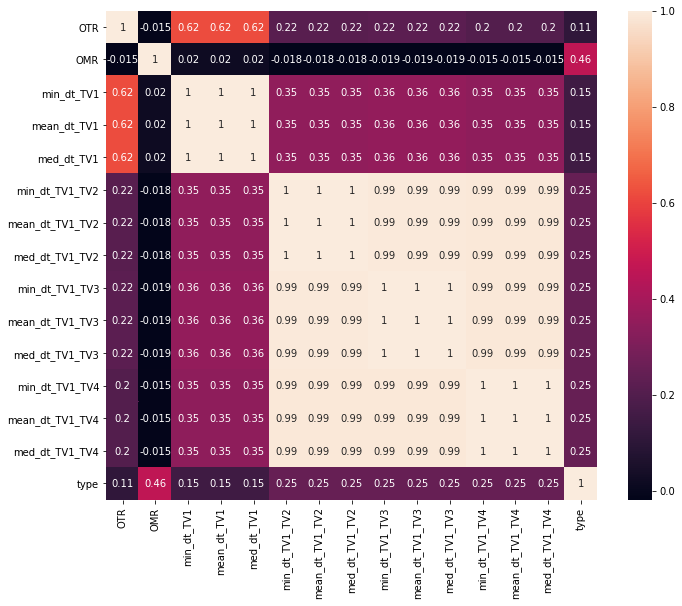

In [55]:
corrMatrix = df_nan.corr()

f, ax = plt.subplots(figsize=(11, 9))

sn.heatmap(corrMatrix, annot=True)
plt.show()

## Train